In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurnet import NeuralNetwork

100%|██████████| 2000/2000 [00:39<00:00, 50.19it/s]


Text(0, 0.5, '$y$')

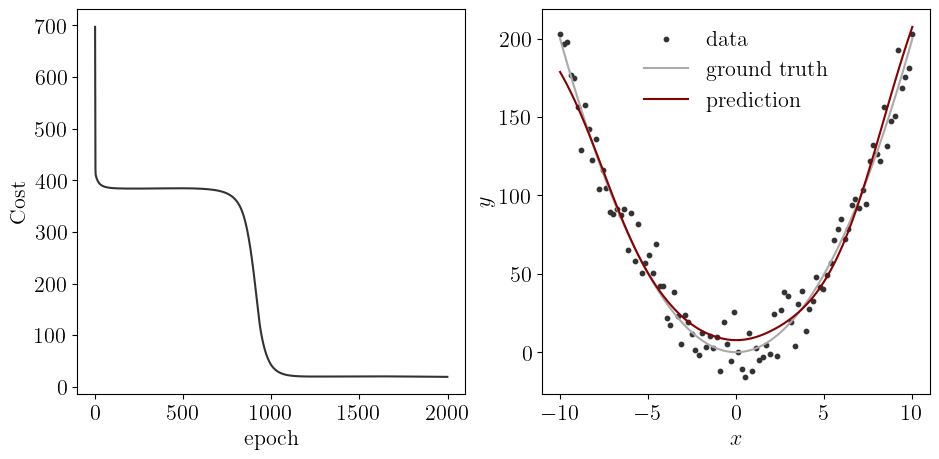

In [2]:
"""
    EXAMPLE 1:  one-to-one fit numerical data
"""

# Generate synthetic data with noise
def scalar_function(X):
    return 2*X**2

n_vals = 100
noise = 10
X_test = np.linspace(-10,10, n_vals).reshape(1, n_vals)
Y_test = scalar_function(X_test) + noise*np.random.randn(1, n_vals)



# Create the network
topology = [64, 64, 1]
activation_funcs = ['sigmoid',
                    'sigmoid',
                    'linear']
n_inputs = 1
ryc = NeuralNetwork(n_inputs,
                    topology,
                    activation_funcs,
                    cost_func='mse')

cost = ryc.train(X_test, Y_test,
                 num_epochs=2000,
                 batch_size=5,
                 learning_rate=5e-6,
                 verbose=False)


# Plots +++++++++++++++++++++++++++++++++++++++++++
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('text', usetex=True)
plt.rc('font', **font)

fig, axs = plt.subplots(ncols=2, figsize=(11, 5))
ax_cost = axs[0]
ax_result = axs[1]

ax_cost.plot(cost, color='#333333')
ax_cost.set_ylabel(r"Cost")
ax_cost.set_xlabel(r"epoch")


ax_result.scatter(X_test.T,
               Y_test.T,
               s=10,
               color="#333333",
               label="data")


ax_result.plot(X_test.T,
               scalar_function(X_test.T),
                color="#aaaaaa",
                label="ground truth")


ax_result.plot(X_test.T,
               ryc.forward(X_test).T,
                color="#880000",
                label="prediction")

ax_result.legend(frameon=False)

ax_result.set_xlabel(r"$x$")
ax_result.set_ylabel(r"$y$")
